In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LassoCV,RidgeCV
from scipy.stats import ttest_ind, levene
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold,ShuffleSplit,cross_val_score,RepeatedKFold
import warnings
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings("ignore")

from sklearn.feature_selection import SelectFromModel

In [2]:
data_LA = pd.read_csv("input/LA_total.csv",index_col=0)
data_XA = pd.read_csv("input/XA_total.csv",index_col=0)


data_LA_ = pd.DataFrame()
columns_LA = data_LA.columns
for col in columns_LA:
    try:
        df = data_LA[col].astype(np.float64)
        data_LA_ = pd.concat([data_LA_,df],axis=1)
    except:
        pass
    continue
    
data_XA_ = pd.DataFrame()
columns_XA = data_XA.columns
for col in columns_XA:
    try:
        df = data_XA[col].astype(np.float64)
        data_XA_ = pd.concat([data_XA_,df],axis=1)
    except:
        pass
    continue

# 方差齐性
index_ = []
for col in data_LA_.columns:
    if levene(data_LA_[col],data_XA_[col])[1] > 0.05:
        if ttest_ind(data_LA_[col],data_XA_[col])[1] < 0.05:
            index_.append(col)
    else:
        if ttest_ind(data_LA_[col],data_XA_[col],equal_var=False)[1] < 0.05:
            index_.append(col)


data_L_T = data_LA_[index_]
data_X_T = data_XA_[index_]

In [3]:
data = pd.concat([data_L_T,data_X_T])
data = shuffle(data)
data

,MVI,diagnosticsImage-originalMean,diagnosticsImage-originalMinimum,diagnosticsMask-originalVoxelNum,originalshapeFlatness,originalshapeLeastAxisLength,originalshapeMaximum2DDiameterRow,originalshapeMaximum2DDiameterSlice,originalshapeMeshVolume,originalshapeMinorAxisLength,...,wavelet-LLLglszmGrayLevelNonUniformity,wavelet-LLLglszmLowGrayLevelZoneEmphasis,wavelet-LLLglszmSizeZoneNonUniformity,wavelet-LLLglszmSizeZoneNonUniformityNormalized,wavelet-LLLglszmSmallAreaEmphasis,wavelet-LLLglszmZoneEntropy,wavelet-LLLglszmZonePercentage,wavelet-LLLngtdmCoarseness,wavelet-LLLngtdmContrast,wavelet-LLLngtdmStrength
L27,0.0,-572.468909,-1024.0,310.0,0.000000,0.000000,22.318967,25.702492,1283.212372,10.044991,...,8.368421,0.009067,95.105263,0.500554,0.735249,5.806156,0.612903,0.051376,0.151701,39.193379
X14,1.0,-614.479883,-1024.0,841.0,0.325347,11.606881,41.031098,18.722147,3211.358643,16.271385,...,17.169935,0.008837,113.405229,0.370605,0.629734,6.051654,0.363853,0.010544,0.091911,5.268588
L20,0.0,-519.434062,-1024.0,585.0,0.470212,9.947152,23.717578,22.359344,1902.632141,13.088408,...,19.300429,0.010607,88.622318,0.380353,0.640048,5.582590,0.398291,0.013391,0.055859,4.511572
X13,1.0,-561.705713,-1024.0,5.0,0.000000,0.000000,8.117304,2.174066,11.028646,1.229837,...,1.400000,0.327778,5.000000,1.000000,1.000000,1.921928,1.000000,0.342857,1.060667,4.837209
X32,1.0,-1011.874072,-3024.0,144.0,0.467858,8.351445,15.605997,16.102215,343.855290,14.703789,...,4.296703,0.022263,50.230769,0.551986,0.769669,5.226439,0.631944,0.135631,0.145841,43.031788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L45,0.0,-618.750804,-1024.0,3040.0,0.184973,21.184937,87.116639,50.781805,13139.636920,37.892768,...,132.664148,0.007296,392.306465,0.329392,0.591371,5.602077,0.391776,0.002724,0.027985,0.830082
L57,0.0,-651.740777,-1024.0,1077.0,0.554254,14.544836,26.468711,27.300936,4666.411388,19.105224,...,23.406667,0.013062,100.653333,0.335511,0.596677,5.717587,0.278552,0.006583,0.074280,1.334465
X9,1.0,-547.092129,-1024.0,380.0,0.454595,7.835145,21.224320,16.322570,1416.078392,13.758645,...,8.823204,0.023080,60.889503,0.336406,0.590477,6.042421,0.476316,0.028226,0.211781,10.460162
X5,1.0,-475.194220,-1024.0,303.0,0.229733,6.209354,26.476129,12.483830,892.256973,10.614482,...,8.042945,0.014268,67.638037,0.414957,0.663182,5.689176,0.537954,0.023778,0.338459,6.332368


In [4]:
target = data.iloc[:, 0]
features = data.iloc[:,1:]

features
target.nunique()

2

In [5]:
transfer = StandardScaler()
features_SS = transfer.fit_transform(features)

features_SS.shape

(138, 459)

In [6]:

# alphas_ = np.logspace(-2,0,300)


# lassocv = LassoCV(alphas = alphas_,cv = 10,max_iter = 100000)
# sfm = SelectFromModel(lassocv)
# sfm.fit_transform(features_SS, target)
# # features = features[features.columns[lassocv.coef_!=0]]
# # print(len(features.columns))
# selected_features = sfm.get_support(indices=True)
# print("Selected features:", selected_features)
# all_features = [f'Feature_{i+1}' for i in range(selected_features.shape[1])]
# # features_SS =features_SS[:, pd.DataFrame(features_SS).columns[lassocv.coef_!=0]]
# all_features.shape


In [7]:
features_SS.shape

(138, 459)

In [8]:
# # 

# # 初始化 RidgeCV 模型，指定一组 alpha 值
# alphas_ = np.logspace(-2,0,300)
# ridge_cv = RidgeCV(alphas=alphas_)

# # 使用 SelectFromModel 进行特征选择
# sfm = SelectFromModel(ridge_cv)
# sfm.fit(features_SS, target)



In [9]:
# # # 获取选择的特征索引
# selected_features = sfm.get_support(indices=True)

# # 打印选择的特征索引
# print("Selected features indices:", selected_features)
# features_SS = pd.DataFrame(features_SS).iloc[:, selected_features]

# features_SS.shape

In [10]:
lda = LinearDiscriminantAnalysis(n_components=1)

In [11]:
features_lda = lda.fit_transform(features_SS,target)

In [12]:
features_lda.shape

(138, 1)

In [13]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_target, test_target = train_test_split(
    features_lda, target, 
    test_size = 0.3)

In [14]:
train_features.shape

(96, 1)

In [15]:
test_features.shape

(42, 1)

In [16]:
#邏輯回歸
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(penalty='l2',max_iter = 10000000,n_jobs=-1)

log.fit(train_features, train_target)
test_predict = log.predict(test_features)
# print(test_target)
# print(test_predict)
log.score(test_features,test_target)

0.9761904761904762

In [17]:
log.predict(test_features)

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 1., 1.])

In [18]:
tree_clf = DecisionTreeClassifier()

In [19]:
tree_clf.fit(train_features, train_target)

DecisionTreeClassifier()

In [20]:
test_predict = tree_clf.predict(test_features)
test_predict

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 1., 1.])

In [21]:
tree_clf.score(test_features,test_target)

0.9523809523809523

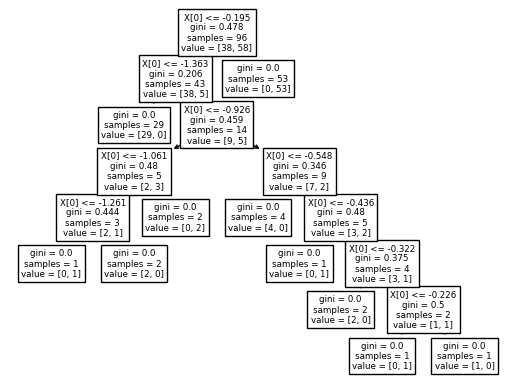

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plot_tree(tree_clf) 
plt.show()

In [23]:
#randomForest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 20)
model_rf = model.fit(train_features,train_target)
score_rf = model_rf.score(test_features,test_target)
print(score_rf)

0.9523809523809523


In [24]:
model_rf.predict(test_features)

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 1., 1.])

In [25]:
#svm
from sklearn.svm import SVC
svc_linear = SVC(kernel = "linear",max_iter=-1)
svc_linear.fit(train_features, train_target)
test_predict = svc_linear.predict(test_features)
svc_linear.score(test_features,test_target)

0.9761904761904762

In [26]:
svc_linear.predict(test_features)

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 1., 1.])

In [27]:
svc_rbf = SVC(kernel="rbf",degree=3,coef0=0)
svc_rbf.fit(train_features, train_target)
test_predict = svc_rbf.predict(test_features)
svc_rbf.score(test_features,test_target)

0.9761904761904762

In [28]:
svc_rbf.predict(test_features)

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 1., 1.])

In [29]:
svc_poly = SVC(kernel="poly",degree=3,coef0=0)
svc_poly.fit(train_features, train_target)
test_predict = svc_poly.predict(test_features)
svc_poly.score(test_features,test_target)

0.8333333333333334

In [30]:
svc_poly.predict(test_features)

array([1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 1.])

In [31]:
#集成算法
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

log_clf = LogisticRegression(penalty='l2',max_iter = 10000000,n_jobs=-1)
svc_linear = SVC(kernel = "linear",max_iter=-1)
svc_poly = SVC(kernel="poly",degree=3,coef0=0)
svc_rbf = SVC(kernel="rbf",degree=3,coef0=0)
tree_clf = DecisionTreeClassifier()

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('svc_l', svc_linear),('svc_p',svc_poly),('svc_r',svc_rbf)],
    voting='hard')
#, ('tree', tree_clf)
voting_clf.fit(train_features, train_target)

for clf in (log_clf, svc_linear,svc_poly,svc_rbf, voting_clf):
    clf.fit(train_features, train_target)
    print(clf.__class__.__name__, clf.score(test_features, test_target))


LogisticRegression 0.9761904761904762
SVC 0.9761904761904762
SVC 0.8333333333333334
SVC 0.9761904761904762
VotingClassifier 0.9761904761904762


In [32]:
voting_clf.predict(test_features)

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 1., 1.])

In [33]:
log_clf = LogisticRegression(penalty='l2',max_iter = 10000000,n_jobs=-1)
svc_linear = SVC(kernel = "linear",max_iter=-1,probability=True)
svc_poly = SVC(kernel="poly",degree=3,coef0=0,probability=True)
svc_rbf = SVC(kernel="rbf",degree=3,coef0=0,probability=True)
tree_clf = DecisionTreeClassifier()

voting_clf = VotingClassifier(
     estimators=[('lr', log_clf), ('svc_l', svc_linear),('svc_p',svc_poly),('svc_r',svc_rbf)],
    voting='soft')
#, ('tree', tree_clf)
voting_clf.fit(train_features, train_target)
for clf in (log_clf,  svc_linear,svc_poly,svc_rbf, voting_clf):
    clf.fit(train_features, train_target)
    print(clf.__class__.__name__, clf.score(test_features, test_target))

LogisticRegression 0.9761904761904762
SVC 0.9761904761904762
SVC 0.8333333333333334
SVC 0.9761904761904762
VotingClassifier 0.9761904761904762


In [34]:
voting_clf.predict(test_features)

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 1., 1.])

In [35]:
from sklearn.ensemble import StackingClassifier
log_clf = LogisticRegression(penalty='l2',max_iter = 10000000,n_jobs=-1)
svc_linear = SVC(kernel = "linear",max_iter=-1,probability=True)
svc_poly = SVC(kernel="poly",degree=3,coef0=0,probability=True)
svc_rbf = SVC(kernel="rbf",degree=3,coef0=0,probability=True)
tree_clf = DecisionTreeClassifier()

log_ensemble = LogisticRegression()

stk_clf = StackingClassifier(
      estimators=[('lr', log_clf), ('svc_l', svc_linear),
                  ('svc_p',svc_poly),('svc_r',svc_rbf)],
    final_estimator=log_ensemble)

stk_clf.fit(train_features, train_target)

stk_clf.score(test_features, test_target)

0.9761904761904762

In [36]:
rkf=RepeatedKFold(n_splits=10,n_repeats=10)


log_clf = LogisticRegression(penalty='l2',max_iter = 10000000,n_jobs=-1)
svc_linear = SVC(kernel = "linear",max_iter=-1,probability=True)
svc_poly = SVC(kernel="poly",degree=3,coef0=0,probability=True)
svc_rbf = SVC(kernel="rbf",degree=3,coef0=0,probability=True)
tree_clf = DecisionTreeClassifier()

voting_clf = VotingClassifier(
     estimators=[('lr', log_clf), ('svc_l', svc_linear),('svc_p',svc_poly),('svc_r',svc_rbf)],
    voting='soft')
sum_score = 0

for train_index, test_index in rkf.split(features_lda):
    X_train =pd.DataFrame(features_lda).iloc[train_index]
    X_test =pd.DataFrame(features_lda).iloc[test_index]
    # print(train_index)
    # print(test_index)
    y_train =pd.DataFrame(target).iloc[train_index]
    y_test =pd.DataFrame(target).iloc[test_index]
    model_svm = voting_clf.fit(X_train,y_train)
    score_svm=model_svm.score(X_test,y_test)
    sum_score+=score_svm
    
print(sum_score/100)

0.9464835164835166


In [37]:
from sklearn.decomposition import PCA

In [38]:
pca_95 = PCA(n_components=100)

In [39]:
features_95 = pca_95.fit_transform(features_SS)

In [40]:
features_95

array([[-1.56762642e+00, -6.14394036e+00, -5.87746840e+00, ...,
         1.48027383e-01, -2.54059601e-04,  1.21772079e-02],
       [ 1.35500472e+00,  4.56816082e+00, -5.34499327e+00, ...,
        -2.14018458e-01, -4.71534827e-02,  6.15016398e-02],
       [-2.35517192e-01,  6.64676388e-02, -5.72585132e+00, ...,
         3.99579995e-01,  2.57755878e-02, -3.90237560e-01],
       ...,
       [ 4.76982831e+00, -1.69260261e+00, -5.51044536e+00, ...,
         1.05367955e-01,  2.78847721e-01,  1.27193034e-01],
       [ 1.80366950e+00, -2.88534891e+00, -5.80045433e+00, ...,
        -3.47656913e-02,  5.76471002e-02,  4.82596304e-01],
       [ 7.23584374e+00, -1.34154760e+00, -6.14632919e+00, ...,
         2.37494542e-01,  2.65386724e-01, -7.73621059e-03]])

In [41]:
train_features_full, test_features, train_target_full, test_target = train_test_split(
    features_95, target, 
    test_size = 0.15)
print(train_features_full.shape)
print(train_target_full.shape)
print(test_features.shape)
print(test_target.shape)
train_features, validation_features, train_target, validation_target = train_test_split(
    train_features_full, train_target_full, 
    test_size = 0.15)
print(train_features.shape)
print(train_target.shape)
print(validation_features.shape)
print(validation_target.shape)
print(test_features.shape)
print(test_target.shape)

(117, 100)
(117,)
(21, 100)
(21,)
(99, 100)
(99,)
(18, 100)
(18,)
(21, 100)
(21,)


In [42]:
from tensorflow import keras
input_  = keras.layers.Input(shape = train_features.shape[1:])
hidden1 = keras.layers.Dense(10,activation='selu')(input_)
hidden2 = keras.layers.Dense(5,activation='selu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1,activation='sigmoid')(concat)
model_wide = keras.Model(inputs=[input_], outputs=[output])

2024-04-03 19:02:51.349989: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-03 19:02:52.696581: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [43]:
model_wide.compile(loss = 'binary_crossentropy', metrics = 'accuracy', optimizer='rmsprop')

In [44]:
model_wide.fit(train_features, train_target, batch_size = 20, epochs=200,
         validation_data=(validation_features, validation_target))

Epoch 1/200
5/5 [==============================] - 1s 49ms/step - loss: 1.2849 - accuracy: 0.4949 - val_loss: 1.0158 - val_accuracy: 0.6111
Epoch 2/200
5/5 [==============================] - 0s 8ms/step - loss: 1.1806 - accuracy: 0.4949 - val_loss: 0.9690 - val_accuracy: 0.6111
Epoch 3/200
5/5 [==============================] - 0s 18ms/step - loss: 1.1055 - accuracy: 0.5051 - val_loss: 0.9361 - val_accuracy: 0.6667
Epoch 4/200
5/5 [==============================] - 0s 14ms/step - loss: 1.0451 - accuracy: 0.5152 - val_loss: 0.9067 - val_accuracy: 0.6667
Epoch 5/200
5/5 [==============================] - 0s 11ms/step - loss: 0.9868 - accuracy: 0.5051 - val_loss: 0.8817 - val_accuracy: 0.6667
Epoch 6/200
5/5 [==============================] - 0s 14ms/step - loss: 0.9338 - accuracy: 0.5152 - val_loss: 0.8577 - val_accuracy: 0.6111
Epoch 7/200
5/5 [==============================] - 0s 17ms/step - loss: 0.8844 - accuracy: 0.5152 - val_loss: 0.8352 - val_accuracy: 0.6111
Epoch 8/200
5/5 [====

In [45]:
features_len = features_95.shape[1]

features_len

100

In [46]:
train_features_A = train_features[:,:features_len//3]
train_features_B = train_features[:,features_len//3:]

validation_features_A = validation_features[:,:features_len//3]
validation_features_B = validation_features[:,features_len//3:]
train_features_B

array([[-5.71118055e-01, -3.59808605e-01, -1.94592764e+00, ...,
        -2.78010049e-02,  3.86765089e-02, -1.95710097e-02],
       [-1.87473156e+00,  6.83776835e-01,  8.40076486e-01, ...,
        -3.47656913e-02,  5.76471002e-02,  4.82596304e-01],
       [ 1.49463469e-01, -3.21355530e-02,  3.70996538e-02, ...,
        -1.46259247e-01, -3.11010699e-01,  1.43902610e-02],
       ...,
       [ 2.30711147e-01, -1.50799934e-01, -8.11202366e-01, ...,
        -4.02798288e-02,  2.66977944e-02, -5.03046846e-03],
       [-1.74700197e+00, -1.05729890e+00,  5.78545904e-01, ...,
        -1.55054676e-02, -2.48159928e-02,  8.69302432e-02],
       [-3.03925116e-01,  7.09033597e-02,  6.54317020e-01, ...,
         1.11413243e-01,  9.35795173e-03, -6.40036034e-04]])

In [47]:
input_A = keras.layers.Input(shape=[features_len//3], name="wide_input")
input_B = keras.layers.Input(shape=[features_len-features_len//3], name="deep_input")
hidden1_ = keras.layers.Dense(5, activation="selu")(input_B)
hidden2_ = keras.layers.Dense(3, activation="selu")(hidden1_)
concat_ = keras.layers.concatenate([input_A, hidden2_])
output_ = keras.layers.Dense(1,activation='sigmoid')(concat_)
model_combine = keras.Model(inputs=[input_A, input_B], outputs=[output_])

In [48]:
model_combine.compile(loss = 'binary_crossentropy', metrics = 'accuracy', optimizer='rmsprop')

In [49]:
model_combine.fit([train_features_A, train_features_B],train_target,batch_size = 20, epochs=150,
                 validation_data=((validation_features_A,validation_features_B), validation_target))

Epoch 1/150
5/5 [==============================] - 1s 40ms/step - loss: 1.1382 - accuracy: 0.6364 - val_loss: 1.3865 - val_accuracy: 0.5000
Epoch 2/150
5/5 [==============================] - 0s 9ms/step - loss: 1.1059 - accuracy: 0.6263 - val_loss: 1.3705 - val_accuracy: 0.5000
Epoch 3/150
5/5 [==============================] - 0s 9ms/step - loss: 1.0836 - accuracy: 0.6364 - val_loss: 1.3560 - val_accuracy: 0.5000
Epoch 4/150
5/5 [==============================] - 0s 9ms/step - loss: 1.0628 - accuracy: 0.6364 - val_loss: 1.3415 - val_accuracy: 0.5000
Epoch 5/150
5/5 [==============================] - 0s 11ms/step - loss: 1.0464 - accuracy: 0.6162 - val_loss: 1.3292 - val_accuracy: 0.5000
Epoch 6/150
5/5 [==============================] - 0s 9ms/step - loss: 1.0277 - accuracy: 0.6162 - val_loss: 1.3159 - val_accuracy: 0.5000
Epoch 7/150
5/5 [==============================] - 0s 10ms/step - loss: 1.0123 - accuracy: 0.6162 - val_loss: 1.3031 - val_accuracy: 0.5000
Epoch 8/150
5/5 [=======

In [50]:
tensorboard_cb = keras.callbacks.TensorBoard(log_dir='output/logs',histogram_freq=1,embeddings_freq=1)

In [51]:
model_combine.fit((train_features_A, train_features_B),train_target,batch_size = 20, epochs=200,
                 validation_data=((validation_features_A,validation_features_B), validation_target),
                  callbacks=tensorboard_cb)

Epoch 1/200
5/5 [==============================] - 0s 62ms/step - loss: 0.1012 - accuracy: 0.9899 - val_loss: 1.2151 - val_accuracy: 0.6111
Epoch 2/200
5/5 [==============================] - 0s 18ms/step - loss: 0.0994 - accuracy: 0.9899 - val_loss: 1.2206 - val_accuracy: 0.6111
Epoch 3/200
5/5 [==============================] - 0s 22ms/step - loss: 0.0977 - accuracy: 0.9899 - val_loss: 1.2260 - val_accuracy: 0.6111
Epoch 4/200
5/5 [==============================] - 0s 18ms/step - loss: 0.0965 - accuracy: 0.9899 - val_loss: 1.2324 - val_accuracy: 0.6111
Epoch 5/200
5/5 [==============================] - 0s 18ms/step - loss: 0.0950 - accuracy: 0.9899 - val_loss: 1.2380 - val_accuracy: 0.6111
Epoch 6/200
5/5 [==============================] - 0s 32ms/step - loss: 0.0934 - accuracy: 0.9899 - val_loss: 1.2448 - val_accuracy: 0.6111
Epoch 7/200
5/5 [==============================] - 0s 29ms/step - loss: 0.0920 - accuracy: 0.9899 - val_loss: 1.2520 - val_accuracy: 0.6111
Epoch 8/200
5/5 [===